In [214]:
from IPython.display import HTML
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

<img src='grocery_store_image1.jpg' width="700" height="300" align="center">

### Customer Purchasing Behavior

In [215]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')



**By: Pieter Leffers**

Starting Date: June 7, 2019

Completion Date: 

Last Updated: 



Project Description
---

### The Ta Feng Grocery Dataset

The Ta Feng Dataset is a Supermarket Dataset containining 817741 transactions from November 2000 until the end of February 2001. The dataset contains information about 119578 shopping baskets, belonging to 32266 users, where 1129939 items were purchased from a range of 23812 products.

Column definition: Transaction date and time (no timestamp), Customer ID, Age Group, PIN Code, Product subclass, Product ID, Amount, Asset, Sales price


Fields of the Dataset are:
- Transaction date and time (time invalid and useless)
- Customer ID
- Age: 10 possible values
- Residence Area: 8 possible values
- Product subclass
- Product ID
- Amount
- Asset
- Sales price

https://www.kaggle.com/chiranjivdas09/ta-feng-grocery-dataset
https://rpubs.com/dmormandy/TaFengGrocery

https://krannert.purdue.edu/masters/programs/business-analytics-and-information-management/experiential-learning/2018/a-solution-to-forecast-demand-using-long-short-term-memory-recurrent-neural-networks-for-time-series-forecasting.php

In [1]:
import pandas as pd
import numpy as np
import pickle
from datetime import date
import datetime as dt
import struct
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
col_names=['transaction_dt', 'customer_id', 'age_group', 'pin_code', 'product_subclass', 'product_id','amount','asset','sales_price']

November dataset

In [3]:
November_2000=pd.read_csv('D11',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
November_2000=November_2000.drop(November_2000.index[0])
November_2000['transaction_dt'] = pd.to_datetime(November_2000['transaction_dt'])
November_2000['age_group'] = November_2000['age_group'].str.strip()
November_2000['pin_code'] = November_2000['pin_code'].str.strip()
November_2000['customer_id'] = November_2000['customer_id'].str.strip()
November_2000.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2000-11-01,00046855,D,E,110411,4710085120468,3,51,57
2,2000-11-01,00539166,E,E,130315,4714981010038,2,56,48
3,2000-11-01,00663373,F,E,110217,4710265847666,1,180,135


December dataset

In [4]:
December_2000=pd.read_csv('D12',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
December_2000=December_2000.drop(December_2000.index[0])
December_2000['transaction_dt'] = pd.to_datetime(December_2000['transaction_dt'])
December_2000['age_group'] = December_2000['age_group'].str.strip()
December_2000['pin_code'] = December_2000['pin_code'].str.strip()
December_2000['customer_id'] = December_2000['customer_id'].str.strip()
December_2000.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2000-12-01,00207423,C,E,530101,4710054134403,1,92,99
2,2000-12-01,00329002,F,E,590514,4710049000973,1,41,49
3,2000-12-01,01657951,E,E,120103,4710011401135,1,23,29


January dataset

In [5]:
January_2001=pd.read_csv('D01',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
January_2001=January_2001.drop(January_2001.index[0])
January_2001['transaction_dt'] = pd.to_datetime(January_2001['transaction_dt'])
January_2001['age_group'] = January_2001['age_group'].str.strip()
January_2001['pin_code'] = January_2001['pin_code'].str.strip()
January_2001['customer_id'] = January_2001['customer_id'].str.strip()
January_2001.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2001-01-01,00141833,F,F,130207,4710105011011,2,44,52
2,2001-01-01,01376753,E,E,110217,4710265849066,1,150,129
3,2001-01-01,01603071,E,G,100201,4712019100607,1,35,39


February dataset

In [6]:
February_2001=pd.read_csv('D02',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
February_2001=February_2001.drop(February_2001.index[0])
February_2001['transaction_dt'] = pd.to_datetime(February_2001['transaction_dt'])
February_2001['age_group'] = February_2001['age_group'].str.strip()
February_2001['pin_code'] = February_2001['pin_code'].str.strip()
February_2001['customer_id'] = February_2001['customer_id'].str.strip()
February_2001.head(3)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price
1,2001-02-01,00557818,H,E,500210,4710114105046,1,123,135
2,2001-02-01,01677683,C,B,711310,4902520163103,6,840,894
3,2001-02-01,01900910,A,D,500206,4710036003598,1,26,33


_______________________

Combine the Datasets
----

In [7]:
age_dict_class = {'A':'<25', 'B':'25-29', 'C':'30-34', 'D':'35-39', 'E':'40-44', \
        'F':'45-49', 'G':'50-54', 'H':'55-59', 'I':'60-64', 'J':'+65', 'K':'unknown'}

age_dict_int = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, \
        'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11}

pin_code_dict_int = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, \
        'F':6, 'G':7, 'H':8}

In [8]:
total_set=November_2000.append(December_2000).append(January_2001).append(February_2001)
total_set['age_label'] = total_set['age_group'].apply(lambda x: age_dict_class[x])
total_set['age_int'] = total_set['age_group'].apply(lambda x: age_dict_int[x])
total_set['pin_code_int'] = total_set['pin_code'].apply(lambda x: pin_code_dict_int[x])

In [9]:
total_set.head()

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int
1,2000-11-01,00046855,D,E,110411,4710085120468,3,51,57,35-39,4,5
2,2000-11-01,00539166,E,E,130315,4714981010038,2,56,48,40-44,5,5
3,2000-11-01,00663373,F,E,110217,4710265847666,1,180,135,45-49,6,5
4,2000-11-01,00340625,A,E,110411,4710085120697,1,17,24,<25,1,5
5,2000-11-01,00236645,D,H,712901,8999002568972,2,128,170,35-39,4,8


Sort by Date

In [10]:
total_set=total_set.sort_values(by=['customer_id','transaction_dt'])
total_set=total_set.reset_index(drop=True)

In [11]:
total_set.head(5)

,transaction_dt,customer_id,age_group,pin_code,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int
0,2000-11-13,00001069,K,E,100314,4710176008699,1,78,98,unknown,11,5
1,2000-11-13,00001069,K,E,100205,9556439880610,1,80,89,unknown,11,5
2,2001-01-21,00001069,K,E,110333,4710320224661,1,361,425,unknown,11,5
3,2001-01-21,00001069,K,E,100311,4710022101208,1,197,198,unknown,11,5
4,2001-01-21,00001069,K,E,110333,4712603661644,1,313,348,unknown,11,5


In [12]:
#total_set.customer_id.value_counts()

In [13]:
def create_dummies(df,column):
    temp=pd.DataFrame(df[column])
    for x in temp[column].unique():
        temp[str(column+'_')+x]=(temp[column]==x).astype(int)
    return temp


temp_age_group=create_dummies(total_set,'age_group')
comparison=sorted(temp_age_group.columns)
temp_age_group=temp_age_group[comparison]

temp_age_group=pd.concat([total_set, temp_age_group], axis=1)

In [14]:
temp_pin_code=create_dummies(temp_age_group,'pin_code')
comparison=sorted(temp_pin_code.columns)
temp_pin_code=temp_pin_code[comparison]

temp_pin_code=pd.concat([temp_age_group, temp_pin_code], axis=1)

In [15]:
total_set=temp_pin_code.drop(['age_group','pin_code'],axis=1)

**Convert Columns to Integers **

*Note: keep in mind some are ordinal categories*

In [16]:
#convert to integers
#total_set['customer_id']=total_set.customer_id.astype(np.int64)
total_set['product_subclass']=total_set.product_subclass.astype(np.int64)
total_set['product_id']=total_set.product_id.astype(np.int64)
total_set['amount']=total_set.amount.astype(np.int64)
total_set['asset']=total_set.asset.astype(np.int64)
total_set['sales_price']=total_set.sales_price.astype(np.int64)
total_set['avg_unit_price']=total_set['sales_price']/total_set['amount']

In [17]:
age_map=total_set.reset_index()
age_map=total_set[['customer_id','age_int']]
age_map=dict(zip(list(age_map.customer_id),list(age_map.age_int)))

In [18]:
pin_map=total_set.reset_index()
pin_map=total_set[['customer_id','pin_code_int']]
pin_map=dict(zip(list(pin_map.customer_id),list(pin_map.pin_code_int)))

In [19]:
total_set.head(3)

,transaction_dt,customer_id,product_subclass,product_id,amount,asset,sales_price,age_label,age_int,pin_code_int,...,age_group_K,pin_code_A,pin_code_B,pin_code_C,pin_code_D,pin_code_E,pin_code_F,pin_code_G,pin_code_H,avg_unit_price
0,2000-11-13,00001069,100314,4710176008699,1,78,98,unknown,11,5,...,1,0,0,0,0,1,0,0,0,98.0
1,2000-11-13,00001069,100205,9556439880610,1,80,89,unknown,11,5,...,1,0,0,0,0,1,0,0,0,89.0
2,2001-01-21,00001069,110333,4710320224661,1,361,425,unknown,11,5,...,1,0,0,0,0,1,0,0,0,425.0


In [20]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 30 columns):
transaction_dt      817741 non-null datetime64[ns]
customer_id         817741 non-null object
product_subclass    817741 non-null int64
product_id          817741 non-null int64
amount              817741 non-null int64
asset               817741 non-null int64
sales_price         817741 non-null int64
age_label           817741 non-null object
age_int             817741 non-null int64
pin_code_int        817741 non-null int64
age_group_A         817741 non-null int32
age_group_B         817741 non-null int32
age_group_C         817741 non-null int32
age_group_D         817741 non-null int32
age_group_E         817741 non-null int32
age_group_F         817741 non-null int32
age_group_G         817741 non-null int32
age_group_H         817741 non-null int32
age_group_I         817741 non-null int32
age_group_J         817741 non-null int32
age_group_K         817741 non-null in

Minimize to just needed columns

In [21]:
minimized_set=total_set[['transaction_dt','customer_id','age_int','product_subclass','product_id','pin_code_int','asset','amount','sales_price']]

In [22]:
minimized_set.head()

,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price
0,2000-11-13,00001069,11,100314,4710176008699,5,78,1,98
1,2000-11-13,00001069,11,100205,9556439880610,5,80,1,89
2,2001-01-21,00001069,11,110333,4710320224661,5,361,1,425
3,2001-01-21,00001069,11,100311,4710022101208,5,197,1,198
4,2001-01-21,00001069,11,110333,4712603661644,5,313,1,348


______________________________________________

Acquisition Cohorts
-----

Identify cohorts based on month of first purchase.

In [23]:
#truncates date object to first day of the month
def get_month(x): return dt.datetime(x.year,x.month,1)

In [24]:
#month of first purchase
minimized_set['transaction_mo']=minimized_set['transaction_dt'].apply(get_month)

In [25]:
grouping=minimized_set['transaction_dt'].apply(get_month)
grouping=minimized_set.groupby('customer_id')['transaction_mo']

In [26]:
#assign smallest invoice month value to each customer
minimized_set['cohort_mo']=grouping.transform('min')

In [27]:
minimized_set[['cohort_mo','transaction_mo']].head(5)

,cohort_mo,transaction_mo
0,2000-11-01,2000-11-01
1,2000-11-01,2000-11-01
2,2000-11-01,2001-01-01
3,2000-11-01,2001-01-01
4,2000-11-01,2001-01-01


Calculate time offset

In [28]:
#helper function for calculating the number of months from the first transaction
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    week=df[column].dt.week
    day=df[column].dt.day
    return year,month,week,day

Assign time offset value

In [29]:
invoice_year,invoice_month,invoice_week,_=get_date_int(minimized_set,'transaction_mo')
cohort_year,cohort_month,cohort_week,_=get_date_int(minimized_set,'cohort_mo')

In [30]:
years_diff=invoice_year-cohort_year
months_diff=invoice_month-cohort_month
week_diff=invoice_week-cohort_week

Identify transaction cohorts

In [31]:
minimized_set['cohort_index']=years_diff*12+months_diff+1 #convert year to months by multiplying difference
minimized_set.head()

,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price,transaction_mo,cohort_mo,cohort_index
0,2000-11-13,00001069,11,100314,4710176008699,5,78,1,98,2000-11-01,2000-11-01,1
1,2000-11-13,00001069,11,100205,9556439880610,5,80,1,89,2000-11-01,2000-11-01,1
2,2001-01-21,00001069,11,110333,4710320224661,5,361,1,425,2001-01-01,2000-11-01,3
3,2001-01-21,00001069,11,100311,4710022101208,5,197,1,198,2001-01-01,2000-11-01,3
4,2001-01-21,00001069,11,110333,4712603661644,5,313,1,348,2001-01-01,2000-11-01,3


Count monthly active customers from each cohort

In [32]:
grouping=minimized_set.groupby(['cohort_mo','cohort_index'])
cohort_data=grouping['customer_id'].apply(pd.Series.nunique)#count number of customer in each group
cohort_data=cohort_data.reset_index()
cohort_counts=cohort_data.pivot(index='cohort_mo',columns='cohort_index',values='customer_id')

In [33]:
cohort_counts

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,16760.0,8618.0,9034.0,9226.0
2000-12-01,6829.0,2523.0,2514.0,NaN
2001-01-01,5021.0,1515.0,NaN,NaN
2001-02-01,3656.0,NaN,NaN,NaN


Cohort Metrics
----

**Customer Retention Rate**

*How many customers returned*

In [34]:
#Store the first column as cohort_sizes 
cohort_sizes=cohort_counts.iloc[:,0]

In [35]:
#Divide all values in the cohort_counts table by cohort_sizes
retention=cohort_counts.divide(cohort_sizes,axis=0)

**Retention Table**


In [36]:
#Review the retention table (first column is expected to have 100% retention rate)
retention.round(3)*100

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,100.0,51.4,53.9,55.0
2000-12-01,100.0,36.9,36.8,NaN
2001-01-01,100.0,30.2,NaN,NaN
2001-02-01,100.0,NaN,NaN,NaN


**Average Quantity for Each Cohort**


In [37]:
grouping=minimized_set.groupby(['cohort_mo','cohort_index'])
cohort_data=grouping['amount'].mean()#average quantity
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='cohort_mo',columns='cohort_index',values='amount')
average_quantity.round(1)

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,1.4,1.4,1.3,1.4
2000-12-01,1.4,1.4,1.4,NaN
2001-01-01,1.3,1.4,NaN,NaN
2001-02-01,1.4,NaN,NaN,NaN


**Average Price for Each Cohort**

In [38]:
grouping=minimized_set.groupby(['cohort_mo','cohort_index'])
cohort_data=grouping['sales_price'].mean()#average quantity
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='cohort_mo',columns='cohort_index',values='sales_price')
average_quantity.round(1)

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,129.7,129.7,140.5,123.2
2000-12-01,132.5,139.6,120.5,NaN
2001-01-01,145.2,128.8,NaN,NaN
2001-02-01,132.6,NaN,NaN,NaN


Visualizing cohort analysis
---------

In [39]:
retention.round(3)*100

cohort_index,1,2,3,4
cohort_mo,,,,
2000-11-01,100.0,51.4,53.9,55.0
2000-12-01,100.0,36.9,36.8,NaN
2001-01-01,100.0,30.2,NaN,NaN
2001-02-01,100.0,NaN,NaN,NaN


In [40]:
retention.index=pd.Series([x.date() for x in retention.index])

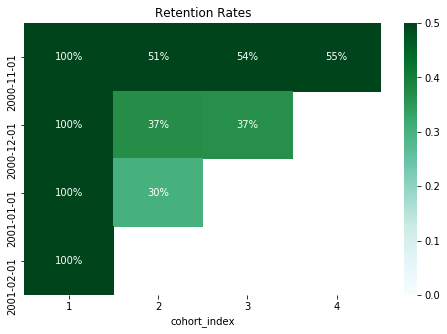

In [41]:
plt.figure(figsize=(8,5))
plt.title('Retention Rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

**Visualize average quantity metric**

In [42]:
average_quantity.index=pd.Series([x.date() for x in average_quantity.index])

In [43]:
average_quantity.round(2)

cohort_index,1,2,3,4
2000-11-01,129.73,129.72,140.5,123.18
2000-12-01,132.53,139.59,120.5,NaN
2001-01-01,145.19,128.85,NaN,NaN
2001-02-01,132.60,NaN,NaN,NaN


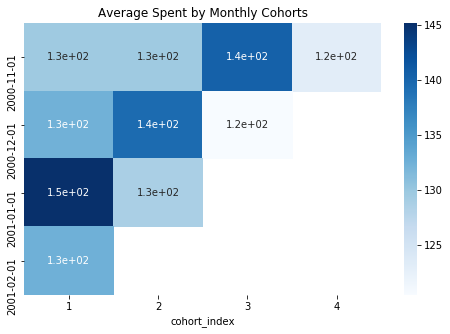

In [44]:
plt.figure(figsize=(8,5))
plt.title('Average Spent by Monthly Cohorts')
sns.heatmap(data=average_quantity,annot=True,cmap='Blues')
plt.show()

___________________

Recency, Frequency, Monetary (RFM) segmentation
=====================

**Grouping RFM values**

Behavioral customer segmentation based on three metrics:
    1. Recency (R)
        - How was each customer's last purchase
    2. Frequency (F)
        - How many purchases the customer has done 
    3. Monetary Value (M)
        - Measures how much the customer has spent 

In [45]:
#Preprocess data
rmf_minimized_set=minimized_set[['product_id','amount','transaction_dt','sales_price','customer_id']]

In [46]:
#Preprocess data
rmf_minimized_set['total_sum']=rmf_minimized_set['sales_price']*minimized_set['amount']

In [47]:
print('min: {}, max: {} '.format(min(rmf_minimized_set.transaction_dt),max(rmf_minimized_set.transaction_dt)))

min: 2000-11-01 00:00:00, max: 2001-02-28 00:00:00 


In [48]:
snapshot_date=max(rmf_minimized_set.transaction_dt)+dt.timedelta(days=1)
snapshot_date

Timestamp('2001-03-01 00:00:00')

RFM for values 

In [49]:
#Aggregate data on a customer level 
rmf_dataframe=rmf_minimized_set.groupby(['customer_id']).agg({
    'transaction_dt':lambda x: (snapshot_date-x.max()).days,
    'product_id':'count','total_sum':'sum'})

#Rename columns for easier interpretation
rmf_dataframe.rename(columns={'transaction_dt':'Recency',
                         'product_id':'Frequency',
                         'total_sum':'MonetaryValue'},inplace=True)

rmf_dataframe.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
00001069,19,11,2660
00001113,54,18,3209
00001250,19,14,1795
00001359,87,3,602
00001823,36,14,6053


**Building RFM Segment Quartiles Using Chosen Thresholds**

In [50]:
r_labels=range(4,0,-1) 
#higher labels higher values
f_labels=range(1,5)
m_labels=range(1,5)

r_quartiles=pd.qcut(rmf_dataframe['Recency'],4,labels=r_labels)
f_quartiles=pd.qcut(rmf_dataframe['Frequency'],4,labels=f_labels)
m_quartiles=pd.qcut(rmf_dataframe['MonetaryValue'],4,labels=f_labels)

rmf_dataframe=rmf_dataframe.assign(R=r_quartiles.values)
rmf_dataframe=rmf_dataframe.assign(F=f_quartiles.values)
rmf_dataframe=rmf_dataframe.assign(M=m_quartiles.values)
rmf_dataframe.head()

,Recency,Frequency,MonetaryValue,R,F,M
customer_id,,,,,,
00001069,19,11,2660,3,2,2
00001113,54,18,3209,2,3,3
00001250,19,14,1795,3,2,2
00001359,87,3,602,1,1,1
00001823,36,14,6053,2,2,3


Build RFM Segment and RFM Score

*RFM Score= Relative Customer Value*

In [51]:
def join_rfm(x): return str(x['R'])+str(x['F'])+str(x['M'])
rmf_dataframe['RFM_Segment']=rmf_dataframe.apply(join_rfm,axis=1)
rmf_dataframe['RFM_Score']=rmf_dataframe[['R','F','M']].sum(axis=1)

In [52]:
rmf_dataframe.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
00001069,19,11,2660,3,2,2,322,7.0
00001113,54,18,3209,2,3,3,233,8.0
00001250,19,14,1795,3,2,2,322,7.0
00001359,87,3,602,1,1,1,111,3.0
00001823,36,14,6053,2,2,3,223,7.0


### Analyzing RFM table

In [53]:
gb_rmf_dataframe=rmf_dataframe.groupby('RFM_Segment').size().sort_values(ascending=False)

Filtering on RFM segments


In [54]:
gb_rmf_dataframe[:10]

RFM_Segment
444    2819
111    2638
344    1663
211    1493
122    1130
333    1117
222    1040
433    1004
233     959
311     923
dtype: int64

In [55]:
#gb_rmf_dataframe[gb_rmf_dataframe==111][:5]

Summary Metrics per RFM Score


In [56]:
rmf_dataframe.groupby('RFM_Score').agg({'Recency':'mean',
    'Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0          90.4       3.1         379.9  2638
4.0          64.6       4.9         739.1  2898
5.0          55.5       6.9        1354.4  3312
6.0          43.4       9.2        2833.9  3960
7.0          39.1      13.5       20457.6  3492
8.0          30.6      18.3        9064.2  3541
9.0          23.2      24.9       23789.4  3374
10.0         18.2      37.0       20721.6  3214
11.0         10.9      55.9      138200.3  3018
12.0          4.1      89.5       44694.4  2819

*Use RFM score to group customers into Gold,Silver,and Bronze segments for easier interpretation.*

In [57]:
def segment_me(df):
    if df['RFM_Score']>=9:
        return 'Gold'
    elif (df['RFM_Score']>=5) and (df['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'

In [58]:
rmf_dataframe['General_Segment']=rmf_dataframe.apply(segment_me,axis=1)

In [59]:
rmf_dataframe.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
customer_id,,,,,,,,,
00001069,19,11,2660,3,2,2,322,7.0,Silver
00001113,54,18,3209,2,3,3,233,8.0,Silver
00001250,19,14,1795,3,2,2,322,7.0,Silver
00001359,87,3,602,1,1,1,111,3.0,Bronze
00001823,36,14,6053,2,2,3,223,7.0,Silver


In [60]:
rmf_dataframe.groupby('General_Segment').agg({'Recency':'mean',
    'Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue       
                   mean      mean          mean  count
General_Segment                                       
Bronze             76.9       4.0         568.0   5536
Gold               14.6      50.2       55528.9  12425
Silver             42.0      12.0        8335.7  14305

## Segmentation Solution Using K-means

In [61]:
rmf_minimized_set=minimized_set[['product_id','amount','transaction_dt','sales_price','customer_id']]
rmf_minimized_set['total_sum']=rmf_minimized_set['sales_price']*minimized_set['amount']
sorted_minimized_set=minimized_set.sort_values(by=['customer_id','transaction_dt']).head(15)
sorted_minimized_set

,transaction_dt,customer_id,age_int,product_subclass,product_id,pin_code_int,asset,amount,sales_price,transaction_mo,cohort_mo,cohort_index
0,2000-11-13,00001069,11,100314,4710176008699,5,78,1,98,2000-11-01,2000-11-01,1
1,2000-11-13,00001069,11,100205,9556439880610,5,80,1,89,2000-11-01,2000-11-01,1
2,2001-01-21,00001069,11,110333,4710320224661,5,361,1,425,2001-01-01,2000-11-01,3
3,2001-01-21,00001069,11,100311,4710022101208,5,197,1,198,2001-01-01,2000-11-01,3
4,2001-01-21,00001069,11,110333,4712603661644,5,313,1,348,2001-01-01,2000-11-01,3
5,2001-02-03,00001069,11,100101,22000167620,5,216,2,192,2001-02-01,2000-11-01,4
6,2001-02-03,00001069,11,120106,4710011402026,5,44,2,46,2001-02-01,2000-11-01,4
7,2001-02-03,00001069,11,110117,4903101125107,5,108,2,58,2001-02-01,2000-11-01,4
8,2001-02-03,00001069,11,110108,4710088620156,5,154,2,130,2001-02-01,2000-11-01,4
9,2001-02-03,00001069,11,100314,4710176008699,5,78,1,70,2001-02-01,2000-11-01,4


In [62]:
snapshot_date=max(rmf_minimized_set.transaction_dt)+dt.timedelta(days=1)
snapshot_date

Timestamp('2001-03-01 00:00:00')

Adding Tenure

In [63]:
dataframe_rfmt=rmf_minimized_set
dataframe_rfmt['transaction_dt_temp']=dataframe_rfmt['transaction_dt']

#Aggregate data on a customer level 
dataframe_rfmt=rmf_minimized_set.groupby(['customer_id']).agg({
    'transaction_dt':lambda x: (snapshot_date-x.max()).days,
    'product_id':'count',
    'total_sum':'sum',
    'transaction_dt_temp':lambda x: (x.max()-x.min()).days})

In [64]:
#Rename columns for easier interpretation
dataframe_rfmt.rename(columns={'transaction_dt':'Recency',
                         'product_id':'Frequency',
                         'total_sum':'MonetaryValue',
                        'transaction_dt_temp':'Tenure'},inplace=True)

dataframe_rfmt['Tenure']=dataframe_rfmt['Tenure']+1

Pre-process data

In [65]:
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
dataframe_rfmt_log = np.log(dataframe_rfmt)

In [66]:
dataframe_rfmt_log.head()

,Recency,Frequency,MonetaryValue,Tenure
customer_id,,,,
00001069,2.944439,2.397895,7.886081,4.499810
00001113,3.988984,2.890372,8.073715,4.025352
00001250,2.944439,2.639057,7.492760,1.945910
00001359,4.465908,1.098612,6.400257,0.000000
00001823,3.583519,2.639057,8.708309,4.430817


In [67]:
# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(dataframe_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
dataframe_rfmt_normalized = scaler.transform(dataframe_rfmt_log)

Calculate and plot sum of squared errors

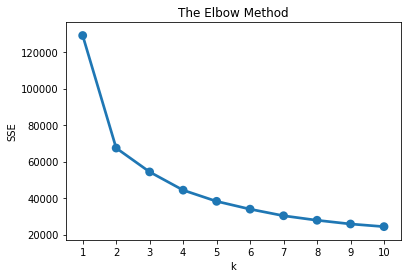

In [68]:
# Import KMeans 
from sklearn.cluster import KMeans
sse={}
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(dataframe_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [69]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(dataframe_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

Analyze the segments

In [70]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
dataframe_rfmt_k3 = dataframe_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = dataframe_rfmt_k3.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure       
           mean      mean          mean   mean  count
Cluster                                              
0          60.0       7.3        1760.3    2.2  12550
1          34.3      20.2        4958.7   55.8  11256
2           8.0      59.0       86811.6   91.7   8460

In [71]:
cluster_map=dataframe_rfmt_k3.reset_index()
cluster_map=cluster_map[['customer_id','Cluster']]
cluster_map=dict(zip(list(cluster_map.customer_id),list(cluster_map.Cluster)))

_______________

Working on Paper
--------

In [561]:
working_set=total_set[['transaction_dt','customer_id','amount','sales_price']]
working_set['total_sum']=working_set['amount']*working_set['sales_price']
working_set=working_set.drop('sales_price',axis=1)
working_set.head(3)

,transaction_dt,customer_id,amount,total_sum
0,2000-11-13,00001069,1,98
1,2000-11-13,00001069,1,89
2,2001-01-21,00001069,1,425


In [562]:
rmf_dataframe=working_set.groupby(['customer_id','transaction_dt']).sum()
rmf_dataframe['frequency']=1
rmf_dataframe['recency']=1
rmf_dataframe['monetary']=1
rmf_dataframe.head(5)

amount  total_sum  frequency  recency  monetary
customer_id transaction_dt                                                 
00001069    2000-11-13           2        187          1        1         1
            2001-01-21           3        971          1        1         1
            2001-02-03           9        922          1        1         1
            2001-02-10           2        580          1        1         1
00001113    2000-11-12           5       1231          1        1         1

In [563]:
lower_limit=total_set.transaction_dt.min()
upper_limit=total_set.transaction_dt.max()

def diff_days(start_day,end_day):  
    delta = start_day - end_day
    return delta.days

Recency

In [564]:
ident_ticker=[0]
recency=[]
frequency=[]
monetary=[]
summer=0
counter=0

In [565]:
for i in range(len(rmf_dataframe.index)):
    customer_id=rmf_dataframe.index[i][0]
    transaction_dt=rmf_dataframe.index[i][1].date()
    ident_ticker.append(customer_id)
    if ident_ticker[-2]!=customer_id:
        
        start_date=lower_limit.date()
        end_date=transaction_dt
        recency.append(diff_days(start_date,end_date))
    else:
        start_date=rmf_dataframe.index[i-1][1].date()
        end_date=transaction_dt
        recency.append(diff_days(start_date,end_date))
        
rmf_dataframe['recency']=recency

Frequency

In [566]:
for i in range(len(rmf_dataframe.index)):
    customer_id=rmf_dataframe.index[i][0]
    transaction_dt=rmf_dataframe.index[i][1].date()
    ident_ticker.append(customer_id)
    counter+=1
    if ident_ticker[-2]!=customer_id:
        counter=1
        frequency.append(counter)
    else:
        frequency.append(counter)
        
rmf_dataframe['frequency']=frequency

Monetary

In [567]:
for i in range(len(rmf_dataframe.index)):
    customer_id=rmf_dataframe.index[i][0]
    transaction_dt=rmf_dataframe.index[i][1].date()
    ident_ticker.append(customer_id)
    counter+=1
    summer+=rmf_dataframe.total_sum.values[i]
    if ident_ticker[-2]!=customer_id:
        summer=rmf_dataframe.total_sum.values[i]
        monetary.append(summer)
    else:
        monetary.append(summer)

rmf_dataframe['monetary']=monetary        

In [568]:
rmf_df_reset=rmf_dataframe.reset_index()
rmf_df_reset.tail()

,customer_id,transaction_dt,amount,total_sum,frequency,recency,monetary
119573,20002000,2000-12-16,28,3769,23,-1,82688
119574,20002000,2000-12-17,16,1896,24,-1,84584
119575,20002000,2000-12-18,27,4432,25,-1,89016
119576,20002000,2001-01-20,9,1165,26,-33,90181
119577,20002000,2001-02-05,6,216,27,-16,90397


In [569]:
#wk_set['total_sum']=wk_set['amount']*wk_set['sales_price']
rmf_df_reset['week']=[x.isocalendar()[1] for x in rmf_df_reset['transaction_dt']]
rmf_df_reset=rmf_df_reset.sort_values(by=['transaction_dt','customer_id']).reset_index(drop=True)
wk_dict_int = {44:0, 45:1, 46:2, 47:3, 48:4, \
        49:5, 50:6, 51:7, 52:8, 1:9, 2:10 , 3:11 , 4:12, 5:13 ,6:14 ,7:15,8:16,9:17}

In [570]:
rmf_df_reset['week_number'] = rmf_df_reset['week'].apply(lambda x: wk_dict_int[x])
rmf_df_reset=rmf_df_reset.drop('week',axis=1)
rmf_df_reset=rmf_df_reset.sort_values(by=['customer_id','week_number'])

In [571]:
rmf_df_reset['Cluster'] = rmf_df_reset['customer_id'].apply(lambda x: cluster_map[x])
rmf_df_reset['age_int'] = rmf_df_reset['customer_id'].apply(lambda x: age_map[x])
rmf_df_reset['pin_code_int'] = rmf_df_reset['customer_id'].apply(lambda x: pin_map[x])

In [572]:
final_data=rmf_df_reset[['transaction_dt','customer_id','week_number','amount','total_sum','frequency','recency','monetary','Cluster','age_int','pin_code_int']]
comparison=(final_data['frequency']>1)
print('Avg Frequency:',round(final_data[comparison].frequency.mean()))
print('Avg Week Number:',round(final_data[comparison].week_number.mean()))
round(final_data[comparison].week_number.value_counts())

Avg Frequency: 7
Avg Week Number: 10


16    8084
11    7827
15    6363
14    6339
13    6024
6     5981
12    5677
10    5601
5     5183
4     5135
8     5108
3     4885
9     3526
2     3463
1     3167
17    2834
7     1329
0      786
Name: week_number, dtype: int64

In [573]:
final_data.to_pickle('test_set.pkl')
#month leading up to the final week and has had at least 1 previous transaction 
comparison=((final_data['week_number']<15)) 
#comparison=((final_data['week_number']==11) | (final_data['week_number']==12) | (final_data['week_number']==13) | (final_data['week_number']==14) | (final_data['week_number']==15)) \
#& (final_data['frequency']>1) 
X_set=final_data[comparison]
#last week of data and has had at least 1 previous transaction 
comparison=((final_data['week_number']==16) | (final_data['week_number']==17) & (final_data['frequency']>1))
y_set=final_data[comparison]

In [574]:
y_id_list=sorted(list(y_set.customer_id.unique()))#unique customer ids from final week

In [575]:
X_set=X_set.loc[X_set['customer_id'].isin(y_id_list)]#have to be represented in final week

In [576]:
list_of_indexes = [np.argmin(g['transaction_dt']) for l, g in X_set.groupby('customer_id')]
X_set=X_set.ix[list_of_indexes]#keep only latest transaction from previous month purchases
X_set=X_set.sort_values(by=['customer_id','transaction_dt'])#sort by id
X_set=X_set.reset_index(drop=True)
print('number of unique customer ids:',len(set(list(X_set.customer_id))),'\nlength of the dataset:',len(X_set))
X_set.head()

number of unique customer ids: 7807 
length of the dataset: 7807


,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
0,2000-12-16,00005241,6,6,325,1,-45,325,2,4,6
1,2000-11-11,00006668,1,6,462,1,-10,462,2,4,5
2,2000-11-04,00010801,0,1,89,1,-3,89,2,4,5
3,2000-11-14,00011235,2,3,906,1,-13,906,2,11,6
4,2000-12-03,00011914,4,7,875,1,-32,875,2,4,1


In [577]:
X_set.tail()

,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
7802,2001-02-10,02175799,14,8,1013,1,-101,1013,2,4,6
7803,2001-02-10,02175959,14,5,219,1,-101,219,1,3,7
7804,2001-02-11,02176048,14,10,749,1,-102,749,1,1,7
7805,2001-02-11,02176079,14,21,3907,1,-102,3907,2,4,6
7806,2001-02-11,02176161,14,7,639,1,-102,639,1,3,8


In [578]:
X_set_list=sorted(list(X_set.customer_id.unique()))#get list of unique ids from those represented in the last month
y_set=y_set.loc[y_set['customer_id'].isin(X_set_list)]#return only individuals who made a purchase in the prior month

In [579]:
y_set=y_set.sort_values(by=['customer_id','transaction_dt'])
list_of_indexes = [np.argmin(g['transaction_dt']) for l, g in y_set.groupby('customer_id')]
y_set=y_set.ix[list_of_indexes]
y_set=y_set.reset_index(drop=True)
print('number of unique customer ids:',len(set(list(y_set.customer_id))),'\nlength of the dataset:',len(y_set))
y_set.head()

number of unique customer ids: 7807 
length of the dataset: 7807


,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
0,2001-02-19,00005241,16,6,411,4,-34,6884,2,4,6
1,2001-02-22,00006668,16,2,193,10,-5,9726,2,4,5
2,2001-02-19,00010801,16,4,161,15,-7,7607,2,4,5
3,2001-02-27,00011235,17,7,1527,5,-10,4579,2,11,6
4,2001-02-28,00011914,17,4,552,5,-53,3632,2,4,1


In [580]:
y_set.tail()

,transaction_dt,customer_id,week_number,amount,total_sum,frequency,recency,monetary,Cluster,age_int,pin_code_int
7802,2001-02-28,02175799,17,2,203,2,-18,1216,2,4,6
7803,2001-02-24,02175959,16,3,263,2,-14,482,1,3,7
7804,2001-02-25,02176048,16,2,58,2,-14,807,1,1,7
7805,2001-02-25,02176079,16,21,2853,2,-14,6760,2,4,6
7806,2001-02-24,02176161,16,7,473,3,-6,1650,1,3,8


In [581]:
X_set=X_set[['customer_id','Cluster','pin_code_int','age_int','week_number','frequency','recency','monetary']]#reduce Xset
y_set=y_set[['customer_id','frequency','recency','monetary']]#reduce yset

In [582]:
X_set.to_pickle('X_set.pkl')
y_set.to_pickle('y_set.pkl')

_____________________________

In [780]:
with open('X_set.pkl', 'rb') as fp:
     X_set = pickle.load(fp)
with open('y_set.pkl', 'rb') as fp:
     y_set = pickle.load(fp)

In [781]:
X_set.head(3)

,customer_id,Cluster,pin_code_int,age_int,week_number,frequency,recency,monetary
0,00005241,2,6,4,6,1,-45,325
1,00006668,2,5,4,1,1,-10,462
2,00010801,2,5,4,0,1,-3,89


In [782]:
y_set.head(3)

,customer_id,frequency,recency,monetary
0,00005241,4,-34,6884
1,00006668,10,-5,9726
2,00010801,15,-7,7607


_________________

Model

In [783]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Input, Dense, Dropout, LSTM
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping

from keras import regularizers
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras import optimizers

In [784]:
def return_pair(df,indexer=0):
    data=df.iloc[indexer]
    x=[]
    part1=list(map(int,list(data.iloc[0])))
    part2=list(data.iloc[1:])
    x.extend(part1)
    x.extend(part2)
    x=np.array(x)
    return x

In [785]:
X_set=np.array([return_pair(X_set,i) for i in range(0,len(X_set))])
#X_set=np.array(X_set.values)

In [786]:
X_set[0]

array([  0,   0,   0,   0,   5,   2,   4,   1,   2,   6,   4,   6,   1,
       -45, 325], dtype=int64)

In [787]:
y_set=np.array([return_pair(y_set,i) for i in range(0,len(y_set))])
#y_set=np.array(y_set.values)

In [788]:
y_set[0]

array([   0,    0,    0,    0,    5,    2,    4,    1,    4,  -34, 6884],
      dtype=int64)

In [789]:
n_orig_size=len(X_set)
n_train_percent = round(n_orig_size*.2)
print('Original size:',n_orig_size,'\n20 Percent of size:',n_train_percent)

Original size: 7807 
20 Percent of size: 1561


In [790]:
train_X=X_set[n_train_percent:,:]
#train_y=y_set[n_train_percent:,-3:]
train_y=y_set[n_train_percent:,:]
test_X=X_set[:n_train_percent, :]
#test_y=y_set[:n_train_percent, -3:]
test_y=y_set[:n_train_percent, :]

In [791]:
train_X.shape,test_X.shape

((6246, 15), (1561, 15))

In [792]:
train_y.shape,test_y.shape

((6246, 11), (1561, 11))

In [793]:
scaler_y = MinMaxScaler(feature_range=(0, 1))
train_y = scaler_y.fit_transform(train_y)
test_y = scaler_y.fit_transform(test_y)

In [794]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
rescaled_x_train = scaler_x.fit_transform(train_X)
rescaled_x_test = scaler_x.fit_transform(test_X)

In [795]:
# reshape input to be 3D [samples, timesteps, features]
train_X = rescaled_x_train.reshape((rescaled_x_train.shape[0], 1, rescaled_x_train.shape[1]))
test_X = rescaled_x_test.reshape((rescaled_x_test.shape[0], 1, rescaled_x_test.shape[1]))
print('train_X',train_X.shape,'\ntrain_y', train_y.shape,'\ntest_X', test_X.shape,'\ntest_y', test_y.shape)
 

train_X (6246, 1, 15) 
train_y (6246, 11) 
test_X (1561, 1, 15) 
test_y (1561, 11)


In [796]:
epochs = 1000
learning_rate = 0.001
model = Sequential()
model.add(SimpleRNN(15,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(250,kernel_initializer='random_uniform', activity_regularizer=regularizers.l1(0.0001)))
model.add(Dense(11))
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_31 (SimpleRNN)    (None, 15)                465       
_________________________________________________________________
dense_72 (Dense)             (None, 250)               4000      
_________________________________________________________________
dense_73 (Dense)             (None, 11)                2761      
Total params: 7,226
Trainable params: 7,226
Non-trainable params: 0
_________________________________________________________________


Train on 6246 samples, validate on 1561 samples
Epoch 1/1000
6246/6246 [==============================] - 3s 465us/step - loss: 0.1878 - mean_absolute_error: 0.2097 - acc: 0.2362 - val_loss: 0.1344 - val_mean_absolute_error: 0.1895 - val_acc: 0.3709
Epoch 2/1000
6246/6246 [==============================] - 1s 104us/step - loss: 0.1087 - mean_absolute_error: 0.1423 - acc: 0.4781 - val_loss: 0.1057 - val_mean_absolute_error: 0.1643 - val_acc: 0.4741
Epoch 3/1000
6246/6246 [==============================] - 1s 99us/step - loss: 0.0841 - mean_absolute_error: 0.1203 - acc: 0.5973 - val_loss: 0.0904 - val_mean_absolute_error: 0.1475 - val_acc: 0.4612
Epoch 4/1000
6246/6246 [==============================] - 1s 103us/step - loss: 0.0681 - mean_absolute_error: 0.0993 - acc: 0.6966 - val_loss: 0.0767 - val_mean_absolute_error: 0.1291 - val_acc: 0.4849
Epoch 5/1000
6246/6246 [==============================] - 1s 99us/step - loss: 0.0570 - mean_absolute_error: 0.0841 - acc: 0.7206 - val_loss: 0.0

6246/6246 [==============================] - 1s 89us/step - loss: 0.0134 - mean_absolute_error: 0.0303 - acc: 0.7675 - val_loss: 0.0168 - val_mean_absolute_error: 0.0471 - val_acc: 0.7175
Epoch 42/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0133 - mean_absolute_error: 0.0305 - acc: 0.7613 - val_loss: 0.0164 - val_mean_absolute_error: 0.0454 - val_acc: 0.7457
Epoch 43/1000
6246/6246 [==============================] - 1s 89us/step - loss: 0.0130 - mean_absolute_error: 0.0299 - acc: 0.7671 - val_loss: 0.0163 - val_mean_absolute_error: 0.0453 - val_acc: 0.7540
Epoch 44/1000
6246/6246 [==============================] - 1s 86us/step - loss: 0.0129 - mean_absolute_error: 0.0295 - acc: 0.7797 - val_loss: 0.0162 - val_mean_absolute_error: 0.0458 - val_acc: 0.7489
Epoch 45/1000
6246/6246 [==============================] - 1s 90us/step - loss: 0.0127 - mean_absolute_error: 0.0296 - acc: 0.7674 - val_loss: 0.0160 - val_mean_absolute_error: 0.0465 - val_acc: 0.7502
Epoc

Epoch 82/1000
6246/6246 [==============================] - 1s 94us/step - loss: 0.0099 - mean_absolute_error: 0.0263 - acc: 0.7650 - val_loss: 0.0132 - val_mean_absolute_error: 0.0441 - val_acc: 0.7226
Epoch 83/1000
6246/6246 [==============================] - 1s 94us/step - loss: 0.0099 - mean_absolute_error: 0.0261 - acc: 0.7690 - val_loss: 0.0131 - val_mean_absolute_error: 0.0449 - val_acc: 0.7175
Epoch 84/1000
6246/6246 [==============================] - 1s 98us/step - loss: 0.0098 - mean_absolute_error: 0.0263 - acc: 0.7671 - val_loss: 0.0132 - val_mean_absolute_error: 0.0447 - val_acc: 0.7252
Epoch 85/1000
6246/6246 [==============================] - 1s 94us/step - loss: 0.0098 - mean_absolute_error: 0.0260 - acc: 0.7688 - val_loss: 0.0132 - val_mean_absolute_error: 0.0446 - val_acc: 0.7271
Epoch 86/1000
6246/6246 [==============================] - 1s 93us/step - loss: 0.0097 - mean_absolute_error: 0.0260 - acc: 0.7622 - val_loss: 0.0131 - val_mean_absolute_error: 0.0449 - val_ac

6246/6246 [==============================] - 1s 87us/step - loss: 0.0085 - mean_absolute_error: 0.0248 - acc: 0.7546 - val_loss: 0.0120 - val_mean_absolute_error: 0.0471 - val_acc: 0.7226
Epoch 123/1000
6246/6246 [==============================] - 1s 89us/step - loss: 0.0084 - mean_absolute_error: 0.0246 - acc: 0.7562 - val_loss: 0.0119 - val_mean_absolute_error: 0.0479 - val_acc: 0.7226
Epoch 124/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0084 - mean_absolute_error: 0.0248 - acc: 0.7528 - val_loss: 0.0120 - val_mean_absolute_error: 0.0473 - val_acc: 0.7207
Epoch 125/1000
6246/6246 [==============================] - 1s 89us/step - loss: 0.0084 - mean_absolute_error: 0.0245 - acc: 0.7594 - val_loss: 0.0120 - val_mean_absolute_error: 0.0478 - val_acc: 0.7297
Epoch 126/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0084 - mean_absolute_error: 0.0247 - acc: 0.7523 - val_loss: 0.0119 - val_mean_absolute_error: 0.0469 - val_acc: 0.7367


6246/6246 [==============================] - 1s 88us/step - loss: 0.0076 - mean_absolute_error: 0.0239 - acc: 0.7506 - val_loss: 0.0111 - val_mean_absolute_error: 0.0479 - val_acc: 0.7143
Epoch 163/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0076 - mean_absolute_error: 0.0240 - acc: 0.7595 - val_loss: 0.0109 - val_mean_absolute_error: 0.0477 - val_acc: 0.7188
Epoch 164/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0076 - mean_absolute_error: 0.0239 - acc: 0.7509 - val_loss: 0.0111 - val_mean_absolute_error: 0.0473 - val_acc: 0.7290
Epoch 165/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0076 - mean_absolute_error: 0.0239 - acc: 0.7582 - val_loss: 0.0111 - val_mean_absolute_error: 0.0481 - val_acc: 0.7181
Epoch 166/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0075 - mean_absolute_error: 0.0234 - acc: 0.7555 - val_loss: 0.0112 - val_mean_absolute_error: 0.0483 - val_acc: 0.7168


6246/6246 [==============================] - 1s 87us/step - loss: 0.0070 - mean_absolute_error: 0.0231 - acc: 0.7560 - val_loss: 0.0099 - val_mean_absolute_error: 0.0448 - val_acc: 0.7130
Epoch 203/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0070 - mean_absolute_error: 0.0230 - acc: 0.7518 - val_loss: 0.0097 - val_mean_absolute_error: 0.0444 - val_acc: 0.7201
Epoch 204/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0070 - mean_absolute_error: 0.0231 - acc: 0.7526 - val_loss: 0.0100 - val_mean_absolute_error: 0.0452 - val_acc: 0.7207
Epoch 205/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0069 - mean_absolute_error: 0.0227 - acc: 0.7542 - val_loss: 0.0098 - val_mean_absolute_error: 0.0453 - val_acc: 0.7111
Epoch 206/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0069 - mean_absolute_error: 0.0234 - acc: 0.7499 - val_loss: 0.0100 - val_mean_absolute_error: 0.0457 - val_acc: 0.7303


6246/6246 [==============================] - 1s 87us/step - loss: 0.0067 - mean_absolute_error: 0.0232 - acc: 0.7530 - val_loss: 0.0090 - val_mean_absolute_error: 0.0416 - val_acc: 0.7406
Epoch 243/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0066 - mean_absolute_error: 0.0227 - acc: 0.7491 - val_loss: 0.0089 - val_mean_absolute_error: 0.0417 - val_acc: 0.7271
Epoch 244/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0066 - mean_absolute_error: 0.0223 - acc: 0.7536 - val_loss: 0.0090 - val_mean_absolute_error: 0.0445 - val_acc: 0.7309
Epoch 245/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0067 - mean_absolute_error: 0.0241 - acc: 0.7435 - val_loss: 0.0090 - val_mean_absolute_error: 0.0425 - val_acc: 0.7188
Epoch 246/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0066 - mean_absolute_error: 0.0230 - acc: 0.7459 - val_loss: 0.0088 - val_mean_absolute_error: 0.0423 - val_acc: 0.7143


6246/6246 [==============================] - 1s 87us/step - loss: 0.0064 - mean_absolute_error: 0.0235 - acc: 0.7525 - val_loss: 0.0084 - val_mean_absolute_error: 0.0389 - val_acc: 0.7361
Epoch 283/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0064 - mean_absolute_error: 0.0229 - acc: 0.7523 - val_loss: 0.0082 - val_mean_absolute_error: 0.0377 - val_acc: 0.7502
Epoch 284/1000
6246/6246 [==============================] - 1s 86us/step - loss: 0.0064 - mean_absolute_error: 0.0230 - acc: 0.7533 - val_loss: 0.0089 - val_mean_absolute_error: 0.0407 - val_acc: 0.7482
Epoch 285/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0065 - mean_absolute_error: 0.0242 - acc: 0.7472 - val_loss: 0.0083 - val_mean_absolute_error: 0.0407 - val_acc: 0.7104
Epoch 286/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0063 - mean_absolute_error: 0.0225 - acc: 0.7496 - val_loss: 0.0085 - val_mean_absolute_error: 0.0388 - val_acc: 0.7418


6246/6246 [==============================] - 1s 87us/step - loss: 0.0062 - mean_absolute_error: 0.0238 - acc: 0.7472 - val_loss: 0.0080 - val_mean_absolute_error: 0.0383 - val_acc: 0.7008
Epoch 323/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0063 - mean_absolute_error: 0.0232 - acc: 0.7469 - val_loss: 0.0083 - val_mean_absolute_error: 0.0405 - val_acc: 0.7655
Epoch 324/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0064 - mean_absolute_error: 0.0243 - acc: 0.7467 - val_loss: 0.0082 - val_mean_absolute_error: 0.0380 - val_acc: 0.7373
Epoch 325/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0062 - mean_absolute_error: 0.0229 - acc: 0.7435 - val_loss: 0.0082 - val_mean_absolute_error: 0.0375 - val_acc: 0.7252
Epoch 326/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0063 - mean_absolute_error: 0.0244 - acc: 0.7472 - val_loss: 0.0080 - val_mean_absolute_error: 0.0376 - val_acc: 0.7252


6246/6246 [==============================] - 1s 88us/step - loss: 0.0062 - mean_absolute_error: 0.0231 - acc: 0.7403 - val_loss: 0.0079 - val_mean_absolute_error: 0.0352 - val_acc: 0.7380
Epoch 363/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0062 - mean_absolute_error: 0.0235 - acc: 0.7379 - val_loss: 0.0079 - val_mean_absolute_error: 0.0352 - val_acc: 0.7040
Epoch 364/1000
6246/6246 [==============================] - 1s 94us/step - loss: 0.0062 - mean_absolute_error: 0.0240 - acc: 0.7437 - val_loss: 0.0075 - val_mean_absolute_error: 0.0355 - val_acc: 0.7213
Epoch 365/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0061 - mean_absolute_error: 0.0238 - acc: 0.7402 - val_loss: 0.0076 - val_mean_absolute_error: 0.0343 - val_acc: 0.7431
Epoch 366/1000
6246/6246 [==============================] - 1s 92us/step - loss: 0.0061 - mean_absolute_error: 0.0241 - acc: 0.7466 - val_loss: 0.0076 - val_mean_absolute_error: 0.0351 - val_acc: 0.7303


6246/6246 [==============================] - 1s 88us/step - loss: 0.0061 - mean_absolute_error: 0.0233 - acc: 0.7432 - val_loss: 0.0079 - val_mean_absolute_error: 0.0361 - val_acc: 0.7386
Epoch 403/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0061 - mean_absolute_error: 0.0247 - acc: 0.7389 - val_loss: 0.0076 - val_mean_absolute_error: 0.0349 - val_acc: 0.7098
Epoch 404/1000
6246/6246 [==============================] - 1s 90us/step - loss: 0.0060 - mean_absolute_error: 0.0243 - acc: 0.7437 - val_loss: 0.0078 - val_mean_absolute_error: 0.0380 - val_acc: 0.7130
Epoch 405/1000
6246/6246 [==============================] - 1s 89us/step - loss: 0.0060 - mean_absolute_error: 0.0238 - acc: 0.7406 - val_loss: 0.0076 - val_mean_absolute_error: 0.0348 - val_acc: 0.7188
Epoch 406/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0060 - mean_absolute_error: 0.0234 - acc: 0.7387 - val_loss: 0.0076 - val_mean_absolute_error: 0.0342 - val_acc: 0.7354


6246/6246 [==============================] - 1s 87us/step - loss: 0.0060 - mean_absolute_error: 0.0240 - acc: 0.7422 - val_loss: 0.0074 - val_mean_absolute_error: 0.0331 - val_acc: 0.7015
Epoch 443/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0060 - mean_absolute_error: 0.0242 - acc: 0.7373 - val_loss: 0.0074 - val_mean_absolute_error: 0.0342 - val_acc: 0.7290
Epoch 444/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0060 - mean_absolute_error: 0.0241 - acc: 0.7443 - val_loss: 0.0076 - val_mean_absolute_error: 0.0336 - val_acc: 0.7130
Epoch 445/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0060 - mean_absolute_error: 0.0242 - acc: 0.7416 - val_loss: 0.0076 - val_mean_absolute_error: 0.0348 - val_acc: 0.7425
Epoch 446/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0060 - mean_absolute_error: 0.0249 - acc: 0.7337 - val_loss: 0.0076 - val_mean_absolute_error: 0.0337 - val_acc: 0.7495


6246/6246 [==============================] - 1s 88us/step - loss: 0.0060 - mean_absolute_error: 0.0251 - acc: 0.7498 - val_loss: 0.0075 - val_mean_absolute_error: 0.0341 - val_acc: 0.6835
Epoch 483/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0060 - mean_absolute_error: 0.0248 - acc: 0.7378 - val_loss: 0.0074 - val_mean_absolute_error: 0.0334 - val_acc: 0.6989
Epoch 484/1000
6246/6246 [==============================] - 1s 89us/step - loss: 0.0059 - mean_absolute_error: 0.0233 - acc: 0.7434 - val_loss: 0.0075 - val_mean_absolute_error: 0.0320 - val_acc: 0.7233
Epoch 485/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0233 - acc: 0.7474 - val_loss: 0.0074 - val_mean_absolute_error: 0.0337 - val_acc: 0.7226
Epoch 486/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0249 - acc: 0.7483 - val_loss: 0.0072 - val_mean_absolute_error: 0.0333 - val_acc: 0.7239


6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0234 - acc: 0.7488 - val_loss: 0.0074 - val_mean_absolute_error: 0.0354 - val_acc: 0.7028
Epoch 523/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0059 - mean_absolute_error: 0.0252 - acc: 0.7405 - val_loss: 0.0073 - val_mean_absolute_error: 0.0313 - val_acc: 0.7277
Epoch 524/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0241 - acc: 0.7430 - val_loss: 0.0076 - val_mean_absolute_error: 0.0339 - val_acc: 0.7393
Epoch 525/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0252 - acc: 0.7451 - val_loss: 0.0074 - val_mean_absolute_error: 0.0327 - val_acc: 0.6874
Epoch 526/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0251 - acc: 0.7464 - val_loss: 0.0073 - val_mean_absolute_error: 0.0349 - val_acc: 0.7476


6246/6246 [==============================] - 1s 88us/step - loss: 0.0059 - mean_absolute_error: 0.0246 - acc: 0.7403 - val_loss: 0.0072 - val_mean_absolute_error: 0.0320 - val_acc: 0.7265
Epoch 563/1000
6246/6246 [==============================] - 1s 91us/step - loss: 0.0059 - mean_absolute_error: 0.0248 - acc: 0.7371 - val_loss: 0.0072 - val_mean_absolute_error: 0.0313 - val_acc: 0.7040
Epoch 564/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0059 - mean_absolute_error: 0.0251 - acc: 0.7416 - val_loss: 0.0072 - val_mean_absolute_error: 0.0338 - val_acc: 0.6887
Epoch 565/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0243 - acc: 0.7453 - val_loss: 0.0073 - val_mean_absolute_error: 0.0325 - val_acc: 0.7354
Epoch 566/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0059 - mean_absolute_error: 0.0243 - acc: 0.7464 - val_loss: 0.0071 - val_mean_absolute_error: 0.0353 - val_acc: 0.7124


6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0231 - acc: 0.7461 - val_loss: 0.0070 - val_mean_absolute_error: 0.0317 - val_acc: 0.7335
Epoch 603/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0057 - mean_absolute_error: 0.0245 - acc: 0.7413 - val_loss: 0.0071 - val_mean_absolute_error: 0.0317 - val_acc: 0.7168
Epoch 604/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0057 - mean_absolute_error: 0.0239 - acc: 0.7450 - val_loss: 0.0070 - val_mean_absolute_error: 0.0324 - val_acc: 0.7303
Epoch 605/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0057 - mean_absolute_error: 0.0244 - acc: 0.7507 - val_loss: 0.0068 - val_mean_absolute_error: 0.0327 - val_acc: 0.7431
Epoch 606/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0056 - mean_absolute_error: 0.0240 - acc: 0.7475 - val_loss: 0.0068 - val_mean_absolute_error: 0.0298 - val_acc: 0.7168


6246/6246 [==============================] - 1s 88us/step - loss: 0.0057 - mean_absolute_error: 0.0244 - acc: 0.7448 - val_loss: 0.0074 - val_mean_absolute_error: 0.0344 - val_acc: 0.7252
Epoch 643/1000
6246/6246 [==============================] - 1s 89us/step - loss: 0.0057 - mean_absolute_error: 0.0236 - acc: 0.7482 - val_loss: 0.0070 - val_mean_absolute_error: 0.0352 - val_acc: 0.6919
Epoch 644/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0057 - mean_absolute_error: 0.0253 - acc: 0.7475 - val_loss: 0.0071 - val_mean_absolute_error: 0.0330 - val_acc: 0.6855
Epoch 645/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0235 - acc: 0.7478 - val_loss: 0.0072 - val_mean_absolute_error: 0.0330 - val_acc: 0.7393
Epoch 646/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0056 - mean_absolute_error: 0.0237 - acc: 0.7491 - val_loss: 0.0071 - val_mean_absolute_error: 0.0319 - val_acc: 0.7482


6246/6246 [==============================] - 1s 88us/step - loss: 0.0056 - mean_absolute_error: 0.0238 - acc: 0.7402 - val_loss: 0.0068 - val_mean_absolute_error: 0.0313 - val_acc: 0.7207
Epoch 683/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0233 - acc: 0.7422 - val_loss: 0.0069 - val_mean_absolute_error: 0.0326 - val_acc: 0.7438
Epoch 684/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0231 - acc: 0.7477 - val_loss: 0.0069 - val_mean_absolute_error: 0.0340 - val_acc: 0.7226
Epoch 685/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0057 - mean_absolute_error: 0.0251 - acc: 0.7461 - val_loss: 0.0069 - val_mean_absolute_error: 0.0296 - val_acc: 0.7149
Epoch 686/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0243 - acc: 0.7470 - val_loss: 0.0069 - val_mean_absolute_error: 0.0317 - val_acc: 0.7297


6246/6246 [==============================] - 1s 89us/step - loss: 0.0056 - mean_absolute_error: 0.0238 - acc: 0.7435 - val_loss: 0.0073 - val_mean_absolute_error: 0.0340 - val_acc: 0.7335
Epoch 723/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0249 - acc: 0.7451 - val_loss: 0.0071 - val_mean_absolute_error: 0.0343 - val_acc: 0.7258
Epoch 724/1000
6246/6246 [==============================] - 1s 90us/step - loss: 0.0056 - mean_absolute_error: 0.0232 - acc: 0.7477 - val_loss: 0.0070 - val_mean_absolute_error: 0.0310 - val_acc: 0.7425
Epoch 725/1000
6246/6246 [==============================] - 1s 86us/step - loss: 0.0056 - mean_absolute_error: 0.0235 - acc: 0.7555 - val_loss: 0.0069 - val_mean_absolute_error: 0.0332 - val_acc: 0.7329
Epoch 726/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0056 - mean_absolute_error: 0.0248 - acc: 0.7483 - val_loss: 0.0075 - val_mean_absolute_error: 0.0376 - val_acc: 0.7559


6246/6246 [==============================] - 1s 88us/step - loss: 0.0055 - mean_absolute_error: 0.0238 - acc: 0.7467 - val_loss: 0.0070 - val_mean_absolute_error: 0.0330 - val_acc: 0.7707
Epoch 763/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0236 - acc: 0.7469 - val_loss: 0.0070 - val_mean_absolute_error: 0.0316 - val_acc: 0.7534
Epoch 764/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0233 - acc: 0.7472 - val_loss: 0.0068 - val_mean_absolute_error: 0.0331 - val_acc: 0.7297
Epoch 765/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0055 - mean_absolute_error: 0.0246 - acc: 0.7474 - val_loss: 0.0070 - val_mean_absolute_error: 0.0331 - val_acc: 0.7284
Epoch 766/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0263 - acc: 0.7450 - val_loss: 0.0071 - val_mean_absolute_error: 0.0330 - val_acc: 0.7482


6246/6246 [==============================] - 1s 94us/step - loss: 0.0056 - mean_absolute_error: 0.0240 - acc: 0.7501 - val_loss: 0.0071 - val_mean_absolute_error: 0.0344 - val_acc: 0.7194
Epoch 803/1000
6246/6246 [==============================] - 1s 90us/step - loss: 0.0056 - mean_absolute_error: 0.0249 - acc: 0.7458 - val_loss: 0.0068 - val_mean_absolute_error: 0.0363 - val_acc: 0.7329
Epoch 804/1000
6246/6246 [==============================] - 1s 90us/step - loss: 0.0056 - mean_absolute_error: 0.0254 - acc: 0.7427 - val_loss: 0.0070 - val_mean_absolute_error: 0.0341 - val_acc: 0.7028
Epoch 805/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0240 - acc: 0.7458 - val_loss: 0.0069 - val_mean_absolute_error: 0.0338 - val_acc: 0.7284
Epoch 806/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0055 - mean_absolute_error: 0.0244 - acc: 0.7419 - val_loss: 0.0070 - val_mean_absolute_error: 0.0324 - val_acc: 0.7745


6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0260 - acc: 0.7462 - val_loss: 0.0076 - val_mean_absolute_error: 0.0382 - val_acc: 0.7207
Epoch 843/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0226 - acc: 0.7467 - val_loss: 0.0074 - val_mean_absolute_error: 0.0342 - val_acc: 0.7566
Epoch 844/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0056 - mean_absolute_error: 0.0239 - acc: 0.7483 - val_loss: 0.0072 - val_mean_absolute_error: 0.0336 - val_acc: 0.7412
Epoch 845/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0055 - mean_absolute_error: 0.0233 - acc: 0.7430 - val_loss: 0.0073 - val_mean_absolute_error: 0.0346 - val_acc: 0.7675
Epoch 846/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0237 - acc: 0.7442 - val_loss: 0.0069 - val_mean_absolute_error: 0.0344 - val_acc: 0.7438


6246/6246 [==============================] - 1s 87us/step - loss: 0.0057 - mean_absolute_error: 0.0267 - acc: 0.7456 - val_loss: 0.0068 - val_mean_absolute_error: 0.0319 - val_acc: 0.7213
Epoch 883/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0054 - mean_absolute_error: 0.0230 - acc: 0.7448 - val_loss: 0.0068 - val_mean_absolute_error: 0.0329 - val_acc: 0.7367
Epoch 884/1000
6246/6246 [==============================] - 1s 89us/step - loss: 0.0055 - mean_absolute_error: 0.0242 - acc: 0.7438 - val_loss: 0.0073 - val_mean_absolute_error: 0.0374 - val_acc: 0.7220
Epoch 885/1000
6246/6246 [==============================] - 1s 90us/step - loss: 0.0055 - mean_absolute_error: 0.0244 - acc: 0.7494 - val_loss: 0.0071 - val_mean_absolute_error: 0.0328 - val_acc: 0.7373
Epoch 886/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0246 - acc: 0.7430 - val_loss: 0.0072 - val_mean_absolute_error: 0.0343 - val_acc: 0.7438


6246/6246 [==============================] - 1s 88us/step - loss: 0.0054 - mean_absolute_error: 0.0228 - acc: 0.7440 - val_loss: 0.0068 - val_mean_absolute_error: 0.0329 - val_acc: 0.7072
Epoch 923/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0054 - mean_absolute_error: 0.0226 - acc: 0.7534 - val_loss: 0.0069 - val_mean_absolute_error: 0.0313 - val_acc: 0.7245
Epoch 924/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0244 - acc: 0.7426 - val_loss: 0.0070 - val_mean_absolute_error: 0.0316 - val_acc: 0.7252
Epoch 925/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0241 - acc: 0.7477 - val_loss: 0.0069 - val_mean_absolute_error: 0.0327 - val_acc: 0.7783
Epoch 926/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0252 - acc: 0.7470 - val_loss: 0.0069 - val_mean_absolute_error: 0.0348 - val_acc: 0.7277


6246/6246 [==============================] - 1s 88us/step - loss: 0.0055 - mean_absolute_error: 0.0239 - acc: 0.7483 - val_loss: 0.0070 - val_mean_absolute_error: 0.0345 - val_acc: 0.7373
Epoch 963/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0246 - acc: 0.7448 - val_loss: 0.0071 - val_mean_absolute_error: 0.0321 - val_acc: 0.7687
Epoch 964/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0055 - mean_absolute_error: 0.0231 - acc: 0.7523 - val_loss: 0.0070 - val_mean_absolute_error: 0.0318 - val_acc: 0.7585
Epoch 965/1000
6246/6246 [==============================] - 1s 87us/step - loss: 0.0055 - mean_absolute_error: 0.0244 - acc: 0.7406 - val_loss: 0.0070 - val_mean_absolute_error: 0.0352 - val_acc: 0.6861
Epoch 966/1000
6246/6246 [==============================] - 1s 88us/step - loss: 0.0055 - mean_absolute_error: 0.0238 - acc: 0.7466 - val_loss: 0.0069 - val_mean_absolute_error: 0.0323 - val_acc: 0.7444


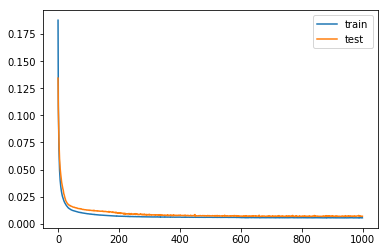

In [797]:
# Define early_stopping_monitor
#early_stopping_monitor = EarlyStopping(patience=50), callbacks=[early_stopping_monitor]
# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=120, validation_data=(test_X, test_y), validation_split=0.3, verbose=1, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [798]:
yhat = model.predict(test_X)
yhat.shape

(1561, 11)

In [799]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[2])
test_X.shape

(1561, 15)

In [800]:
inv_yhat = concatenate((scaler_x.inverse_transform(test_X), scaler_y.inverse_transform(yhat)),axis=1)
inv_y = concatenate((scaler_x.inverse_transform(test_X),scaler_y.inverse_transform(test_y)), axis=1)

In [801]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y[0], inv_yhat[0]))
print('Test RMSE (Prediction): %.3f' % rmse)

Test RMSE (Prediction): 706.314


In [802]:
indexer=21
transformed_id=[''.join(list(map(str,list(map(int,list(scaler_x.inverse_transform(test_X)[indexer][:-6]))))))]
cluster=[scaler_x.inverse_transform(test_X)[indexer][-6]]
pin=[scaler_x.inverse_transform(test_X)[indexer][-5]]
age=[scaler_x.inverse_transform(test_X)[indexer][-4]]
prediction=list(scaler_y.inverse_transform(yhat)[:, :][indexer])

In [803]:
transformed_id

['000225141']

In [805]:
output=pd.DataFrame((transformed_id+cluster+pin+age+prediction)).T.copy()
#output.columns=['ID','Cluster','Pin_code','Age_group','Recency','Freqency','Monetary']
output

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,000225141,8,4,4,-2.6126e-05,0.0724955,0.36989,2.94187,2.15791,4.98604,1.17492,3.87313,1.18595,-45.1802,767.293
